#*4.2 NeuralProphet Multivariate Time Series*

#**Chapter 4.2**

In [ ]:
#google colab accesss
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import librries 
import pandas as pd
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import glob #for maps
import plotly.graph_objects as go
import plotly.offline
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import itertools
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

#model NN
from sklearn.model_selection import train_test_split

from neuralprophet import NeuralProphet

In [ ]:
#python packages
!pip install pystan~=2.14
!pip install fbprophet
#!pip install neuralprophet
!pip install neuralprophet[live]
!pip install statsmodels

##**Read the Data**

In [ ]:
fin_data = pd.read_csv('/content/gdrive/MyDrive/Sent/final_data_May20_Sept22.csv') #without outliers, previously exracted dat

In [ ]:
#groupby date as there are many observations per day
fb_df=fin_data.groupby(['utc'])['nitrogendioxide_tropospheric_column','nitrogendioxide_tropospheric_column_precision','nitrogendioxide_tropospheric_column_precision_kernel',	 'air_mass_factor_troposphere', 'air_mass_factor_total','pm10'].mean()

In [ ]:
#run chekc for stationarity
adfuller(fb_df['pm10'])
#Since the p-value is less than .05, we reject the null hypothesis.

(-15.722246934321685,
 1.3196227046858317e-28,
 0,
 613,
 {'1%': -3.4410627157395908,
  '5%': -2.8662664495424255,
  '10%': -2.5692871001333266},
 3141.9282427268577)

##**Preprocessing|**

In [ ]:
fb_df = fb_df.reset_index(inplace=False)
fb_df.head()

In [ ]:
fb_df.rename(columns={'pm10': 'y', 'utc':'ds'},inplace=True)

In [ ]:
fb_df.head()

,ds,nitrogendioxide_tropospheric_column,nitrogendioxide_tropospheric_column_precision,nitrogendioxide_tropospheric_column_precision_kernel,air_mass_factor_troposphere,air_mass_factor_total,y
0,2020-05-01,0.000012,0.000012,0.000012,1.237246,2.027335,6.261500
1,2020-05-02,0.000037,0.000017,0.000015,1.116818,1.851356,7.395500
2,2020-05-03,0.000041,0.000021,0.000020,0.819890,1.837840,10.091111
3,2020-05-04,0.000055,0.000029,0.000027,0.937185,1.422979,15.311250
4,2020-05-05,0.000028,0.000016,0.000015,1.289110,2.089066,10.266667


##**Model Training**


**Reference**

the script was adopted from the followings websites: 

https://paul-bruffett.medium.com/experimenting-with-neural-prophet-9cc9a0f4921
https://towardsdatascience.com/how-to-use-facebooks-neuralprophet-and-why-it-s-so-powerful-136652d2da8b

https://pub.towardsai.net/neuralprophet-for-time-series-forecasting-predicting-stock-prices-using-facebooks-new-model-c5c191ed4eb8

https://paul-bruffett.medium.com/experimenting-with-neural-prophet-9cc9a0f4921


#**Model 1**#

In [ ]:
#fit a model
#https://paul-bruffett.medium.com/experimenting-with-neural-prophet-9cc9a0f4921

m = NeuralProphet(
    trend_reg=1,
    learning_rate=0.03,
)
df_train, df_test = m.split_df(fb_df[["ds","y"]], freq='D', valid_p = 1.0/10)

metrics = m.fit(df_train, freq='D', validation_df=df_test)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 76.221% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 76.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 77.034% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 77.034% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D

In [ ]:
print(df_train.shape, df_test.shape)

(553, 2) (61, 2)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 67.213% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 67.213% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 67.213% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 67.213% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


MSE comparison ----
NeuralProphet:	12.8170
R2_score ----
NeuralProphet:	-0.2037


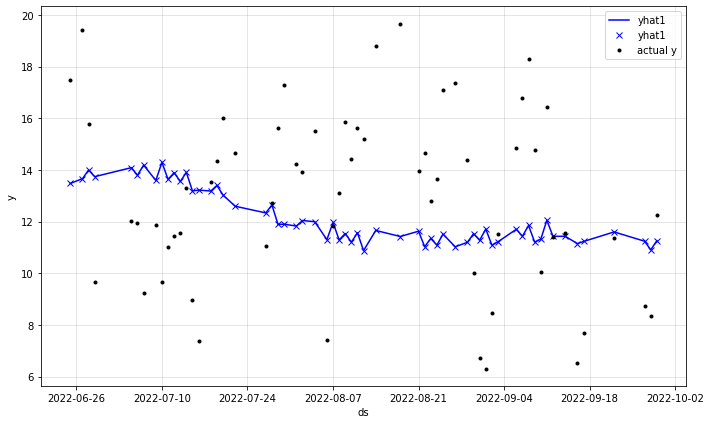

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")
print('R2_score ----')
print(f"NeuralProphet:\t{r2_score(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


#**Model 2**#

In [ ]:
m = NeuralProphet (growth='off', yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, n_lags=1, num_hidden_layers=4, d_hidden=16,learning_rate=0.003)
metrics = m.fit(df_train, freq='D', validation_df=df_test) 

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 77.034% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 77.034% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 232 missing dates added.
INFO:NP.forecaster:232 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 232 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 232 NaN values in column y were auto-imputed.
INFO:NP.forecaster:232 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.__handle_missing_data) - 36 missing dates added.
INFO:NP.forecaster:36 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 36 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 36 NaN values in column y were a

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 67.213% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 67.213% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 67.742% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 67.742% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.forecaster.__handle_missing_data) - 36 missing dates added.
INFO:NP.forecaster:36 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 36 missing values in column 

MSE comparison ----
NeuralProphet:	4.3969
R2_score ----
NeuralProphet:	0.5929


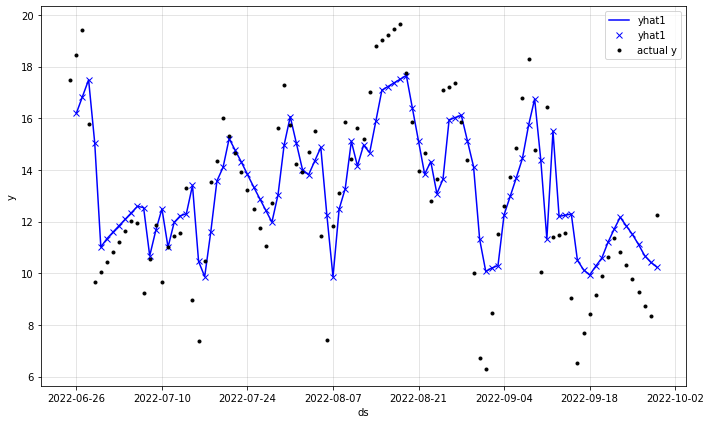

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


print('R2_score ----')
print(f"NeuralProphet:\t{r2_score(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


#**Model 3**#

In [ ]:
m = NeuralProphet(
    growth='on',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    n_lags=2,
    n_forecasts = 24,
    num_hidden_layers=4,
    d_hidden=16,
    learning_rate=0.003,
)

metrics = m.fit(df_train, freq='D', validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 67.213% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 67.213% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 76.471% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 76.471% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 36 missing dates added.
INFO:NP.forecaster:36 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 36 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 36 NaN v

MSE comparison ----
NeuralProphet:	7.5738
R2_score ----
NeuralProphet:	0.2988


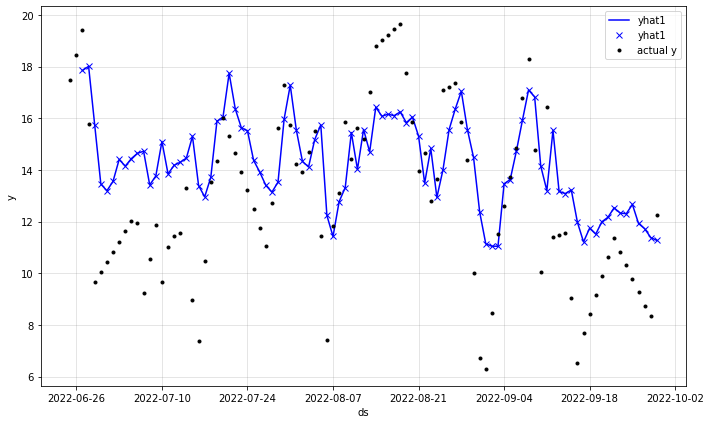

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


print('R2_score ----')
print(f"NeuralProphet:\t{r2_score(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")

#**Model 4**

In [ ]:
https://paul-bruffett.medium.com/experimenting-with-neural-prophet-9cc9a0f4921

m = NeuralProphet(
    trend_reg=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=2,
    n_forecasts = 2,
    num_hidden_layers=4,
    d_hidden=16,
    learning_rate=0.003,
)


m=m.add_lagged_regressor ('nitrogendioxide_tropospheric_column')
m=m.add_lagged_regressor('nitrogendioxide_tropospheric_column_precision')
m=m.add_lagged_regressor('nitrogendioxide_tropospheric_column_precision_kernel')

df_train, df_test = m.split_df(fb_df[["ds","y", 'nitrogendioxide_tropospheric_column','nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel' ]], freq='D', valid_p = 1/10)

metrics = m.fit(df_train, freq='D', validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


MSE comparison ----
NeuralProphet:	6.2896
R2_score ----
NeuralProphet:	0.5259


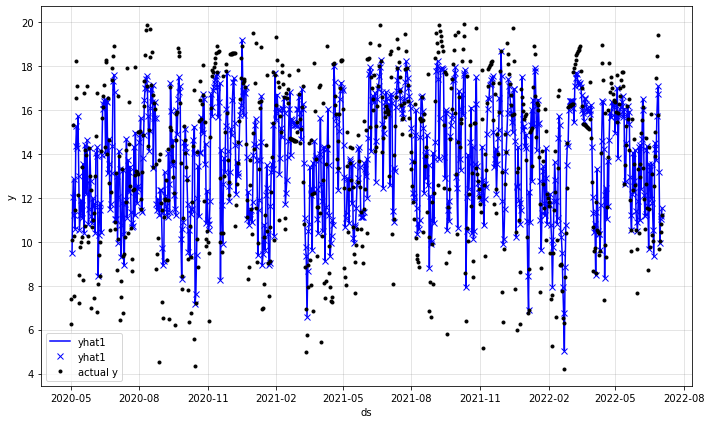

In [ ]:
forecast = m.predict(df_train)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


print('R2_score ----')
print(f"NeuralProphet:\t{r2_score(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.913% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.913% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


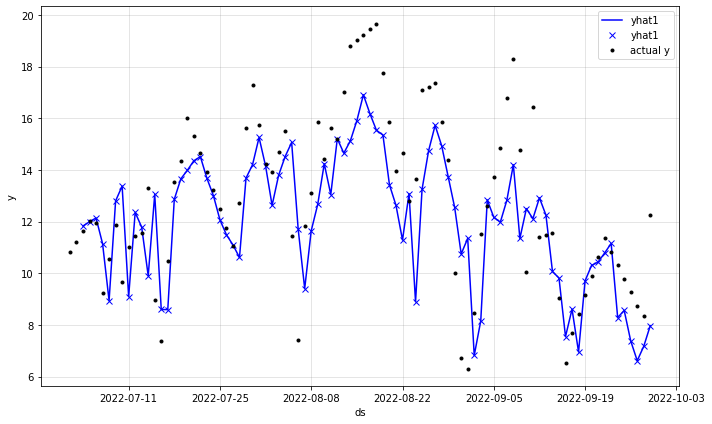

In [ ]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)

In [ ]:
future_df = m.make_future_dataframe(df_train, periods = 553, n_historic_predictions=len(df_train))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 794 historic forecasts, reduced to 792.
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 2.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


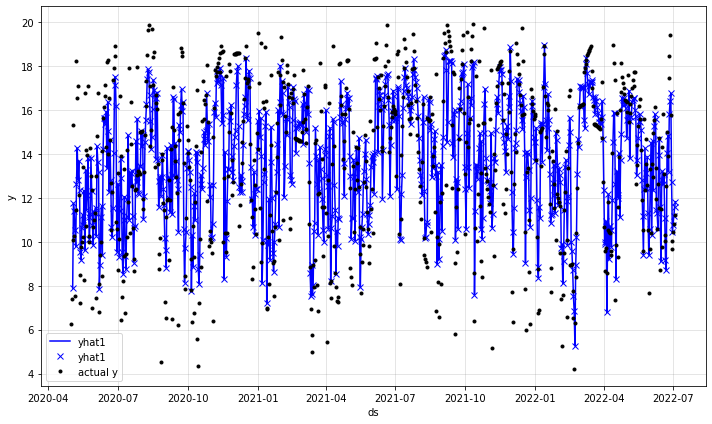

In [ ]:
preds_df_2 = m.predict(future_df)
m.plot(preds_df_2);

In [ ]:
m.plot_components(preds_df_2, residuals=True);

In [ ]:
m.plot_parameters();

#**Model 5**

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 76.221% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 76.221% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 268 missing dates added.
INFO:NP.forecaster:268 missing dates added.
WARNING - (NP.forecaster.__handle_missing_data) - 268 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 268 NaN values in column y were auto-imputed.
INFO:NP.forecaster:268 NaN values in column y were auto-imputed.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO 

MSE comparison ----
NeuralProphet:	4.3655
R2_score ----
NeuralProphet:	0.5931


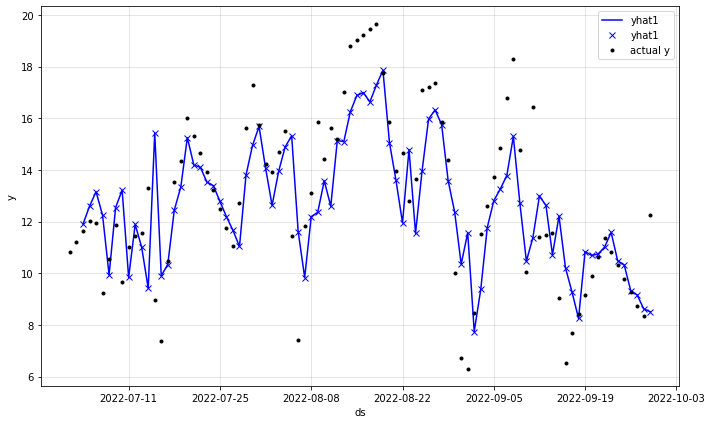

In [ ]:
https://paul-bruffett.medium.com/experimenting-with-neural-prophet-9cc9a0f4921

m = NeuralProphet(
    trend_reg=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=2,
    n_forecasts = 2,
    num_hidden_layers=4,
    d_hidden=16,
    learning_rate=0.003,
)

df_train, df_test = m.split_df(fb_df[["ds","y"]], freq='D', valid_p = 1.0/10)
m=m.add_lagged_regressor ('nitrogendioxide_tropospheric_column')
m=m.add_lagged_regressor('nitrogendioxide_tropospheric_column_precision')
m=m.add_lagged_regressor('nitrogendioxide_tropospheric_column_precision_kernel')
m=m.add_lagged_regressor('air_mass_factor_troposphere')
m=m.add_lagged_regressor('air_mass_factor_total')



df_train, df_test = m.split_df(fb_df[["ds","y", 'nitrogendioxide_tropospheric_column','nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel',  'air_mass_factor_troposphere', 'air_mass_factor_total' ]], freq='D', valid_p = 1/10)

metrics = m.fit(df_train, freq='D', validation_df=df_test)

forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast)


print('MSE comparison ----')
print(f"NeuralProphet:\t{mean_squared_error(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")
print(f"NeuralProphet:\t{r2_score(forecast['y'][2:], forecast['yhat1'][2:]):.4f}")
